In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import re
import time

## web scraping

In [2]:
carname=[]
price=[]
rating=[]
features=[]
for i in range(1,21):
    url='https://www.cars24.com/buy-used-cars-hyderabad/?itm_source=Cars24Website&itm_medium=secondary_cta&page={}'.format(i)
    page=requests.get(url)
    soup=BeautifulSoup(page.text)
    for x in soup.find_all('div',attrs={'class':'col-4'}):
        for i in x.find_all('a',href=True):
            page1=requests.get(i['href'])
            soup1=BeautifulSoup(page1.text)
            for i in soup1.find_all('div',attrs={'class':'_3Ii-d'}):
                pname=i.find('p',attrs={'class':'_3Uk5w'})
                cost=i.find('h4',attrs={'class':"_3AzX6"})
                rat=i.find('p',attrs={'class':"_3bipb"})
                specs=i.find('div',attrs={'class':'jwy8y'})
                if pname is None:
                    carname.append(np.NaN)
                else:
                    carname.append(pname.text)
                if cost is None:
                    price.append(np.NaN)
                else:
                    price.append(cost.text)
                if rat is None:
                    rating.append(np.NaN)
                else:
                    rating.append(rat.text)
                if specs is None:
                    features.append(np.NaN)
                else:
                    features.append(specs.text)
                print('reading data')
        

reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data
reading data

In [ ]:
cars_df=pd.DataFrame({'CarName':carname,'Price':price,'Ratings':rating,'Features':features})

In [ ]:
regex='Kilometers(\d\d?\,?\d+)'
cars_df['Kilometers']=cars_df['Features'].apply(lambda x:re.compile(regex).findall(x))


In [ ]:
regex='\w+\s(\d+)'
cars_df['YearOfPurchase']=cars_df['Features'].apply(lambda x:re.compile(regex).findall(x))
regex='Owner(\w+)\s?Owner'
cars_df['OwnerType']=cars_df['Features'].apply(lambda x:re.compile(regex).findall(x))

In [ ]:
regex='Petrol|Diesel'
cars_df['Fuel']=cars_df['Features'].apply(lambda x:re.compile(regex).findall(x))
regex='\d{4}\s(\w+)'
cars_df['CarBrand']=cars_df['CarName'].apply(lambda x:re.compile(regex).findall(x))
regex='^\d+'
cars_df['YearOfLaunched']=cars_df['CarName'].apply(lambda x:re.compile(regex).findall(x))
regex='Type(\w+)'
cars_df['InsuranceType']=cars_df['Features'].apply(lambda x:re.compile(regex).findall(x))
regex='Transmission(\w+)'
cars_df['Transmission']=cars_df['Features'].apply(lambda x:re.compile(regex).findall(x))
regex='(?:Maruti|Datsun|Hyundai|Honda|Skoda|Tata|Ford|Volkswagen|Renault|Audi|Toyoto|MG|Nissan)\s([\w]+\s?[\w]+?)'
cars_df['Model']=cars_df['CarName'].apply(lambda x:re.compile(regex).findall(x))
cars_df

In [ ]:
#brand,model,yearoflaunch,yearofpurchase,fueltype,kilometer,insurance,ratings,ownertype,tranmission,price

In [ ]:
import warnings
warnings.filterwarnings('ignore')
cars_df['Kilometers']=cars_df['Kilometers'].apply(lambda x:''.join(x))
cars_df['Kilometers']=cars_df['Kilometers'].apply(lambda x:x.replace(',','')).astype(int)
cars_df['YearOfPurchase']=cars_df['YearOfPurchase'].apply(lambda x:''.join(x))
cars_df['YearOfLaunched']=cars_df['YearOfLaunched'].apply(lambda x:''.join(x))
cars_df['Fuel']=cars_df['Fuel'].apply(lambda x:''.join(x))
cars_df['OwnerType']=cars_df['OwnerType'].apply(lambda x:''.join(x))
cars_df['CarBrand']=cars_df['CarBrand'].apply(lambda x:''.join(x))
cars_df['InsuranceType']=cars_df['InsuranceType'].apply(lambda x:''.join(x))
cars_df['Transmission']=cars_df['Transmission'].apply(lambda x:''.join(x))
cars_df['Model']=cars_df['Model'].apply(lambda x:''.join(x))
cars_df['Price']=cars_df['Price'].apply(lambda x:x.replace('₹','').replace(',','')).astype(float)

In [ ]:
regex='(\d\.?\d?)\w+'
cars_df['Ratings']=cars_df['Ratings'].apply(lambda x:re.compile(regex).findall(x))
cars_df['Ratings']=cars_df['Ratings'].apply(lambda x:''.join(x))

In [ ]:
col=['CarBrand','Model','YearOfLaunched','YearOfPurchase','Fuel','Kilometers','InsuranceType','OwnerType','Transmission','Ratings','Price']
cars_df=cars_df[col]

In [ ]:
cars_df['Transmission']=cars_df['Transmission'].replace('',np.NaN)
cars_df['Transmission'].fillna('MANUAL',inplace=True)

In [ ]:
cars_df.to_csv('CarsData')

In [4]:
car_df=pd.read_csv('C:/Users/aduma/Downloads/CarsData')

In [5]:
car_df.drop('Unnamed: 0',axis=1,inplace=True)
car_df['InsuranceType'].fillna('Expired',inplace=True)

In [4]:
car_df

,CarBrand,Model,YearOfLaunched,YearOfPurchase,Fuel,Kilometers,InsuranceType,OwnerType,Transmission,Ratings,Price
0,Hyundai,Santro Xing,2011,2011,Petrol,41925,Comp,First,MANUAL,4.5,253599.0
1,Hyundai,GRAND I10,2020,2020,Petrol,379,Zero_Dep,First,MANUAL,4.8,663599.0
2,Maruti,Alto LXI,2011,2011,Petrol,35039,Comp,First,MANUAL,4.6,228299.0
3,Maruti,Alto LXI,2011,2011,Petrol,23837,Comp,First,MANUAL,4.4,234199.0
4,Hyundai,i20 SPORTZ,2012,2012,Petrol,51853,Expired,First,MANUAL,4.6,379599.0
...,...,...,...,...,...,...,...,...,...,...,...
395,Hyundai,Elite i20,2016,2016,Petrol,24885,Expired,First,MANUAL,4.8,624599.0
396,Maruti,Alto K10,2012,2012,Petrol,48979,Comp,First,MANUAL,4.2,253999.0
397,Maruti,Swift VDI,2012,2012,Diesel,62307,Comp,First,MANUAL,4.4,390499.0
398,Maruti,Baleno DELTA,2018,2018,Petrol,15053,Comp,First,MANUAL,4.8,585999.0


#  Visualisation and Exploratory Data Analysis 

## Univariate  plots

Text(0, 0.5, 'Frequency')

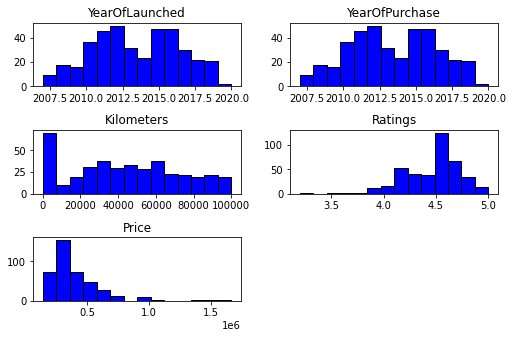

In [7]:
car_df.hist(bins=14,color='blue',edgecolor='black',grid=False)
plt.tight_layout(rect=(0,0,1.2,1.2))
plt.ylabel('Frequency')

In above plots we clearly conclude that kilometers are widely distributed from 0 to 100000 kms and more than 50 cars travelled under 7000 kms.Both year of launched and purchase are NORMALLY DISTRIBUTED with larger variance.
And ratings of the cars are RIGHT SKEWED i.e., most of the cars rating lies at the right side of the plot,almost all cars have minimum 4.0 ratings.
Prices of the cars are LEFT SKEWED i.e.,most of the cars prices lies at the left side of the plot,most of the cars price under 0.8*10^6

<AxesSubplot:xlabel='Price', ylabel='Density'>

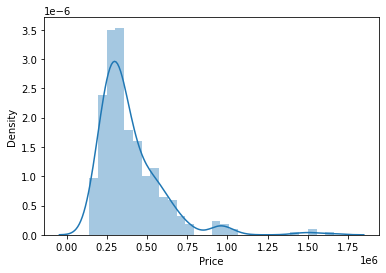

In [4]:
import warnings
warnings.filterwarnings('ignore')
sb.distplot(car_df['Price'])

This plot clearly explains that the prices are normally distributed.And most of the car's price is between 0.12*(10^6) to 
0.75*(10^6)

Text(0, 0.5, 'price')

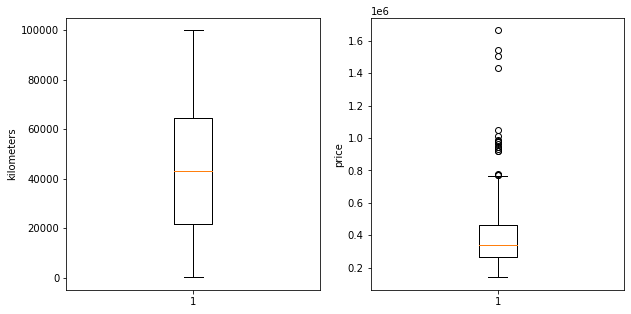

In [8]:
plt.figure(figsize=(10,5))
plt.figure(1)
plt.subplot(1,2,1)
plt.boxplot(car_df['Kilometers'])
plt.ylabel('kilometers')
plt.subplot(1,2,2)
plt.boxplot(car_df['Price'])
plt.ylabel('price')

In above first boxplot, we can see that median is greater than 40000 i.e., more than 50% of the cars are travelled  greater than 40000 kms.If anyone wants to buy a second hand car with less than 40000 kilometers travelled then there is approximately 40 percentage cars only.
In second boxplot,the price have some of the outliers.Except these outliers all the car's price is under 0.8(i.e.,0.8*10^6).These outliers are due to very high variability in the price that is these are greater than 1.5 times of INTER QUARTILE RANGE.

In [9]:
car_df[car_df['Ratings']>4.4]

,CarBrand,Model,YearOfLaunched,YearOfPurchase,Fuel,Kilometers,InsuranceType,OwnerType,Transmission,Ratings,Price
0,Hyundai,Santro Xing,2011,2011,Petrol,41925,Comp,First,MANUAL,4.5,253599.0
1,Hyundai,GRAND I10,2020,2020,Petrol,379,Zero_Dep,First,MANUAL,4.8,663599.0
2,Maruti,Alto LXI,2011,2011,Petrol,35039,Comp,First,MANUAL,4.6,228299.0
4,Hyundai,i20 SPORTZ,2012,2012,Petrol,51853,Expired,First,MANUAL,4.6,379599.0
5,Maruti,Swift VXI,2011,2011,Petrol,46592,Comp,First,MANUAL,4.7,401899.0
...,...,...,...,...,...,...,...,...,...,...,...
393,Hyundai,Grand i10,2017,2017,Petrol,25826,Comp,Second,MANUAL,4.8,500799.0
394,Maruti,Wagon R,2012,2012,Petrol,14631,Comp,First,MANUAL,4.7,348699.0
395,Hyundai,Elite i20,2016,2016,Petrol,24885,Expired,First,MANUAL,4.8,624599.0
398,Maruti,Baleno DELTA,2018,2018,Petrol,15053,Comp,First,MANUAL,4.8,585999.0


Here we can see the cars which are having greater than 4.4 ratings and these cars can be considered as good QUALITY and PERFORMANCE.

In [30]:
car_df[car_df['Price']>1000000]

,CarBrand,Model,YearOfLaunched,YearOfPurchase,Fuel,Kilometers,InsuranceType,OwnerType,Transmission,Ratings,Price
110,MG,Hector,2019,2019,Petrol,26283,Zero_Dep,Second,MANUAL,4.9,1433599.0
176,Toyota,Etios Liva,2015,2015,Diesel,143,Comp,Second,MANUAL,4.6,1049199.0
285,Hyundai,Creta 1,2019,2019,Diesel,16992,Zero_Dep,First,MANUAL,4.8,1502999.0
321,Hyundai,Creta 1,2016,2016,Diesel,22280,Comp,First,MANUAL,4.8,1010699.0
329,Toyota,Fortuner,2019,2019,Diesel,187,Comp,First,MANUAL,4.3,1663999.0
339,Audi,A4,2015,2015,Diesel,87654,Expired,First,AUTOMATIC,4.7,1544099.0


In [8]:
car_df[car_df['Kilometers']>90000]

,CarBrand,Model,YearOfLaunched,YearOfPurchase,Fuel,Kilometers,InsuranceType,OwnerType,Transmission,Ratings,Price
93,Hyundai,Santro Xing,2008,2008,Petrol,98277,Expired,First,MANUAL,4.6,195599.0
125,Hyundai,i10 SPORTZ,2010,2010,Petrol,95991,Comp,Second,MANUAL,4.5,258699.0
126,Maruti,Wagon R,2008,2008,Petrol,99395,Comp,Second,MANUAL,4.1,200499.0
134,Maruti,Ritz ZDI,2012,2012,Diesel,96714,Comp,First,MANUAL,4.7,350799.0
135,Maruti,Alto LXI,2007,2007,Petrol,95597,Third_party,Second,MANUAL,4.1,139199.0
136,Maruti,Swift VDI,2010,2010,Diesel,97591,Expired,First,MANUAL,4.2,313299.0
137,Hyundai,Santro Xing,2009,2009,Petrol,93933,Expired,Second,MANUAL,4.5,223999.0
145,Maruti,Swift Dzire,2015,2015,Petrol,94320,Comp,First,MANUAL,4.7,509299.0
149,Hyundai,Xcent S,2015,2015,Petrol,91984,Expired,First,MANUAL,4.7,410999.0
155,Maruti,Swift VXI,2014,2014,Petrol,95614,Expired,First,MANUAL,4.3,425299.0


Text(0, 0.5, 'Number of cars Launched')

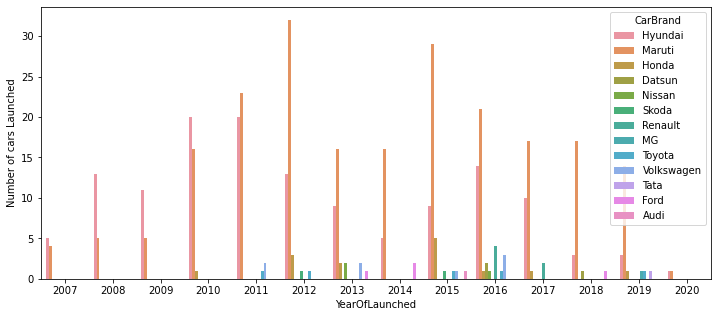

In [5]:
plt.figure(figsize=(12,5))
sb.countplot(x=car_df['YearOfLaunched'],hue=car_df['CarBrand'])
plt.ylabel('Number of cars Launched')

Here we can observe that , in each year maruti and Hyundai are launched more when compared to other Brands.And after 2010 the number of cars launched by maruti is higher than Hyundai.Most number of cars launched by maruti is in the year 2012 and 2015.

Text(0, 0.5, 'Number of cars purchased')

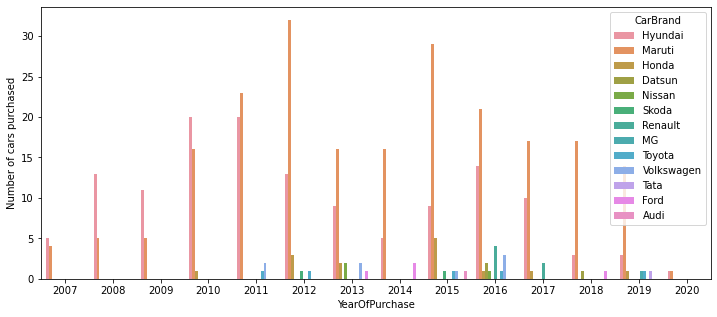

In [6]:
plt.figure(figsize=(12,5))
sb.countplot(x=car_df['YearOfPurchase'],hue=car_df['CarBrand'])
plt.ylabel('Number of cars purchased')

Here,most of the cars purchased by the customers is Maruti and Hyundai only.But between these two brands Maruti have most sales.Maruti has highest sales in the year 2012 and 2015.

## Bivariate plots

Text(0.5, 0, 'Price')

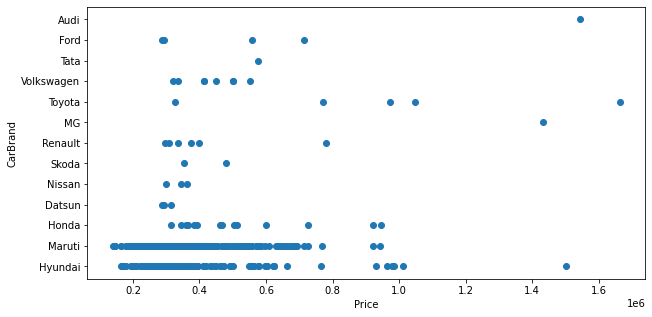

In [42]:
plt.figure(figsize=(10,5))
plt.scatter(data=car_df,x='Price',y='CarBrand')
plt.ylabel('CarBrand')
plt.xlabel('Price')

In above scatter plot ,it showing that most of the cars price falls within 0.8(i.e.,0.8*10^6).Only Toyoto,Audi,Hyundai and MG are the cars 
which having the price at very high range.

<AxesSubplot:xlabel='YearOfPurchase', ylabel='Price'>

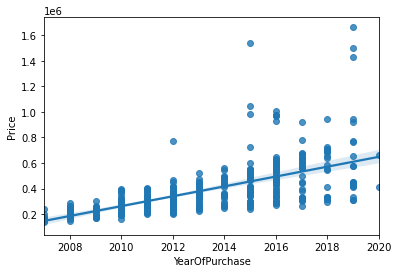

In [41]:
sb.regplot(data=car_df,y='Price',x='YearOfPurchase')

In above regression plot,the price and year of purchase has positive correlation so that as the year of purchase increases the price is also increases.Because as the year of purchase increases the car doesnt used much and the quality of that car might not be decreased with in less time period.

In [24]:
car_df.groupby(['CarBrand'])['InsuranceType'].value_counts()

CarBrand    InsuranceType
Audi        Expired           1
Datsun      Comp              1
            Expired           1
            Third_party       1
Ford        Expired           3
            Comp              1
Honda       Expired          10
            Comp              4
Hyundai     Expired          59
            Comp             52
            Third_party      15
            Zero_Dep         10
MG          Zero_Dep          1
Maruti      Comp             83
            Expired          79
            Zero_Dep         33
            Third_party      21
Nissan      Expired           2
            Comp              1
Renault     Comp              3
            Expired           1
            Third_party       1
            Zero_Dep          1
Skoda       Comp              1
            Expired           1
Tata        Third_party       1
Toyota      Comp              4
            Zero_Dep          1
Volkswagen  Expired           5
            Comp              2
            Th

In above groupby command ,we can clearly observe that all carbrands mostly having Insurancetype of comp(comprehensive) and expired.

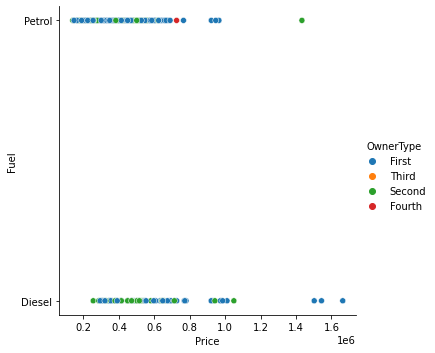

In [9]:
sb.relplot(y='Fuel',x='Price',hue='OwnerType',data=car_df)

In above relational plot we conclude that both Petrol and Diesel cars are available from low prices also.And almost all the cars are first and second hand cars.

<AxesSubplot:xlabel='YearOfPurchase', ylabel='Ratings'>

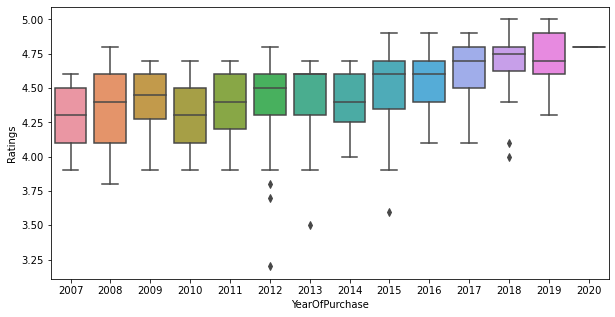

In [12]:
plt.figure(figsize=(10,5))
sb.boxplot(data=car_df,x='YearOfPurchase',y='Ratings')

Here we observe that as increases in year of purchase the ratings slightly increases.This is because of as year of purchase increases the kilometers travelled by the car decreases such that the quality of the car might be good.

In [25]:
car_df.groupby(['CarBrand']).agg({'Price':'max'})

,Price
CarBrand,
Audi,1544099.0
Datsun,315899.0
Ford,713399.0
Honda,947099.0
Hyundai,1502999.0
MG,1433599.0
Maruti,942199.0
Nissan,362099.0
Renault,779299.0


Here we can see the cars of each brand having highest price.Over all carbrands TOYOTO has the highest price of 1663999.0 

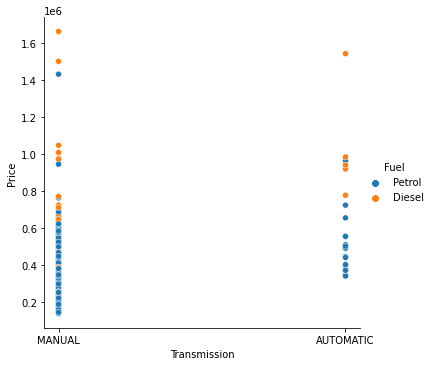

In [21]:
sb.relplot(y='Price',x='Transmission',hue='Fuel',data=car_df)

Here we can observe that most of the manual cars are having low price.But in case of Automatic type every car has high cost when compare to the manual cars.When the price increases the availability of the diesel cars is high.

<AxesSubplot:xlabel='Ratings', ylabel='Transmission'>

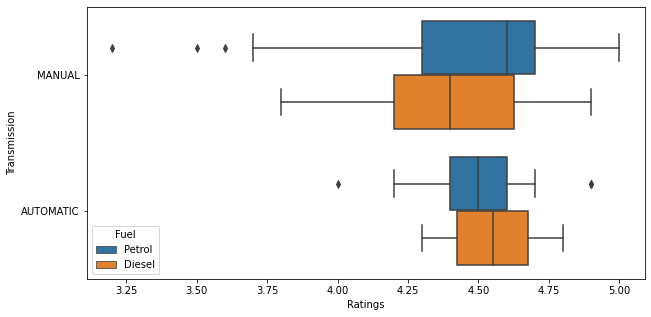

In [23]:
plt.figure(figsize=(10,5))
sb.boxplot(y='Transmission',x='Ratings',hue='Fuel',data=car_df)

In above box plot, we can say that the manual cars have high ratings than automatic ones.Within automatic cars the cars having
fuel type as diesel are rated high.But in manual cars the petrol cars are rated higher than the diesel cars.When comparing overall cars the manual car have high rating of 5.0 which is a petrol type.

## Multi-variate plots

<AxesSubplot:>

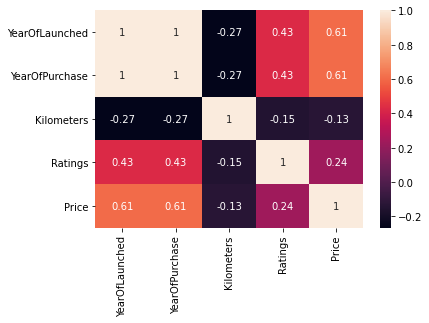

In [12]:
sb.heatmap(car_df.corr(),annot=True)

Here the heatmap shows the relationship between the variables .There is very low Negative correlation between kilometers and ratings,price.And there is low positive correlation between price and ratings.
By observing the above statements, it concludes that as the kilometers travelled by car increases the price and rating of that car slightly decreases.And as the car's price increases the rating increases slightly because the car may have good quality.

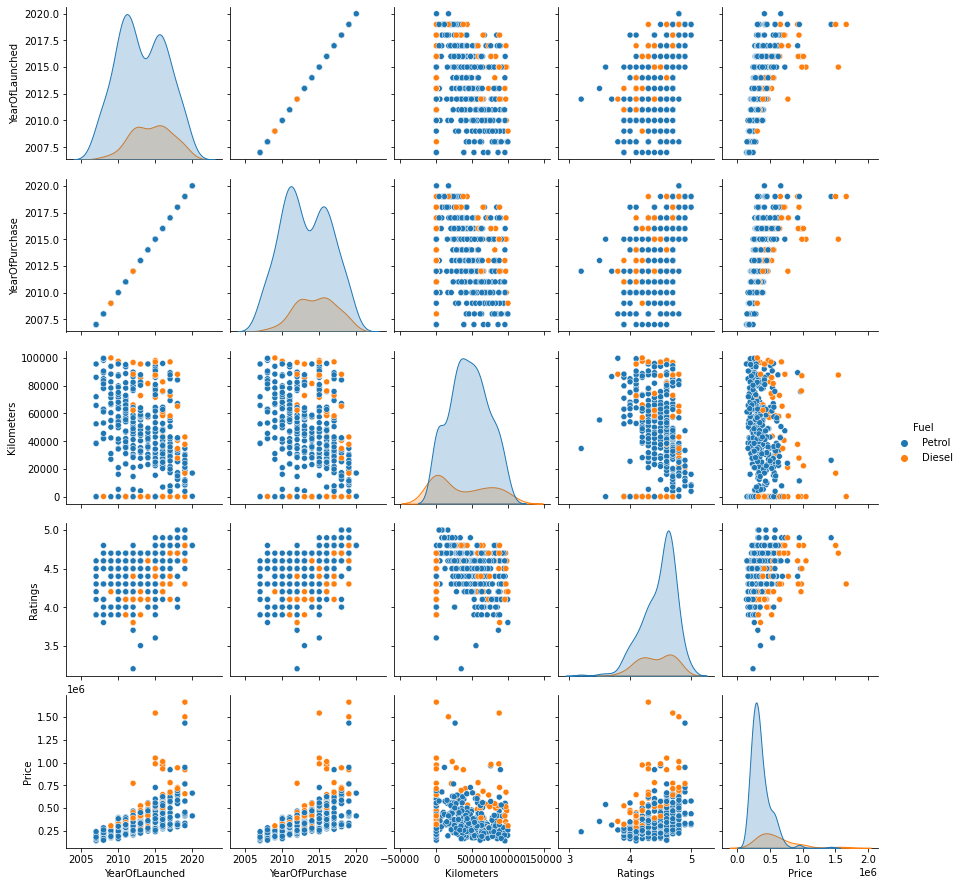

In [18]:
sb.pairplot(data=car_df,hue='Fuel',kind='scatter')

In above pairplot,there is low linear relation between price and year of launched,year of purchase.There are most of the cars with fuel type of petrol.

In [13]:
car_df.describe()

,YearOfLaunched,YearOfPurchase,Kilometers,Ratings,Price
count,400.000000,400.000000,400.000000,400.00000,4.000000e+02
mean,2013.417500,2013.417500,43506.327500,4.47025,3.943138e+05
std,3.184107,3.184107,29222.254699,0.27446,2.033310e+05
min,2007.000000,2007.000000,101.000000,3.20000,1.391990e+05
25%,2011.000000,2011.000000,21871.250000,4.30000,2.645740e+05
50%,2013.000000,2013.000000,43051.000000,4.55000,3.364990e+05
75%,2016.000000,2016.000000,64680.500000,4.70000,4.652240e+05
max,2020.000000,2020.000000,99958.000000,5.00000,1.663999e+06


Here the standard deviation of ratings  is 0.2744 which is the least value when compared to others such that the varability of each dataset from the mean is 0.2744.The average ratings of each car is approximately equals to 4.4.  

In [38]:
car_df.groupby(['Fuel','InsuranceType'])['Transmission'].value_counts()

Fuel    InsuranceType  Transmission
Diesel  Comp           MANUAL           30
                       AUTOMATIC         2
        Expired        MANUAL           21
                       AUTOMATIC         2
        Third_party    MANUAL            4
        Zero_Dep       MANUAL            9
                       AUTOMATIC         2
Petrol  Comp           MANUAL          115
                       AUTOMATIC         5
        Expired        MANUAL          131
                       AUTOMATIC         8
        Third_party    MANUAL           35
                       AUTOMATIC         1
        Zero_Dep       MANUAL           32
                       AUTOMATIC         3
Name: Transmission, dtype: int64

In [98]:
car_df.groupby(['Transmission','Fuel']).agg({'Ratings':['max','min'],'Price':['min','max']})

Ratings          Price           
                        max  min       min        max
Transmission Fuel                                    
AUTOMATIC    Diesel     4.8  4.3  779299.0  1544099.0
             Petrol     4.9  4.0  342399.0   964999.0
MANUAL       Diesel     4.9  3.8  255099.0  1663999.0
             Petrol     5.0  3.2  139199.0  1433599.0

In [99]:
car_df.groupby(['CarBrand']).agg({'Ratings':['max','min'],'Price':['min','max']})

Ratings           Price           
               max  min        min        max
CarBrand                                     
Audi           4.7  4.7  1544099.0  1544099.0
Datsun         4.9  4.7   287799.0   315899.0
Ford           4.7  4.1   286099.0   713399.0
Honda          4.9  4.3   314699.0   947099.0
Hyundai        5.0  3.5   163099.0  1502999.0
MG             4.9  4.9  1433599.0  1433599.0
Maruti         5.0  3.2   139199.0   942199.0
Nissan         4.6  4.3   300199.0   362099.0
Renault        4.8  4.1   295399.0   779299.0
Skoda          4.7  3.8   353899.0   478799.0
Tata           4.5  4.5   574599.0   574599.0
Toyota         4.7  4.2   326399.0  1663999.0
Volkswagen     4.8  3.9   321199.0   552599.0

In [22]:
i=[car_df['CarBrand'],car_df['InsuranceType']]
c=[car_df['Transmission'],car_df['Fuel']]
pd.crosstab(index=i,columns=c)

Transmission             AUTOMATIC        MANUAL       
Fuel                        Diesel Petrol Diesel Petrol
CarBrand   InsuranceType                               
Audi       Expired               1      0      0      0
Datsun     Comp                  0      0      0      1
           Expired               0      0      0      1
           Third_party           0      0      0      1
Ford       Comp                  0      0      1      0
           Expired               0      1      2      0
Honda      Comp                  0      1      0      3
           Expired               0      3      0      7
Hyundai    Comp                  1      2      3     46
           Expired               0      3      2     54
           Third_party           0      0      0     15
           Zero_Dep              1      1      2      6
MG         Zero_Dep              0      0      0      1
Maruti     Comp                  0      2     20     61
           Expired               1      1     15     62
           Third_party           0      1      3     17
           Zero_Dep              1      1      6     25
Nissan     Comp                  0      0      1      0
           Expired               0      0      1      1
Renault    Comp                  1      0      0      2
           Expired               0      0      0      1
           Third_party           0      0      0      1
           Zero_Dep              0      1      0      0
Skoda      Comp                  0      0      1      0
           Expired               0      0      0      1
Tata       Third_party           0      0      0      1
Toyota     Comp                  0      0      3      1
           Zero_Dep              0      0      1      0
Volkswagen Comp                  0      0      1      1
           Expired               0      0      1      4
           Third_party           0      0      1      0

In above crosstab we can clearly observe that  how many cars are manual and automatic cars with type of insurance and type of fuel of each brand.

# # conclusion

 From the above analysis we can conclude that the cars which travelled limited kilometers  are rated higher.As the price of the 
car increases the ratings of the car increases slightly.Here most of the cars have fuel type of petrol. Each company having most insurance type of comprehensive and expired. Owner type of most cars are first and second . Almost all the cars are rated atleast 4.0. Maruti and Hyundai had most cars launched and sales in each year. And there are less number of automatic cars when compared to manual cars. 